In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
     \ 152.8MB 1.6MB/s
     |████████████████████████████████| 6.5MB 11.4MB/s 
     |████████████████████████████████| 225kB 47.3MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759570 sha256=641c04b308c0b35f9c985244ac0b35ec049266976cd019a58d267f7e2a20778f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kt2v_izx/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl

<a id='К_оглавлению'></a>

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

---

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

*Дополнительно:*
- **city_lat_lon** — таблица с информацией о городах и координатами. 

---

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

---

## Разделим данное исследование на несколько частей
1. [Загрузка необходимых данных и библиотек](#Загрузка_необходимых_данных_и_библиотек)
2. [Предобработка таблицы с координатами](#Предобработка_таблицы_с_координатами)
3. [Анализ данных](#Анализ_данных)
4. [Вывод](#Вывод)

<a id='Загрузка_необходимых_данных_и_библиотек'></a>

# Загрузка необходимых данных и библиотек


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.basemap import Basemap

df1 = pd.read_csv('/content/drive/MyDrive/query_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/query_3.csv')
#Таблица с координатами
city_lat_lon = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')

Изучим данные о таблицах.

In [3]:
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df2

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
df2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


[К оглавлению](#К_оглавлению)

---

<a id='Предобработка_таблицы_с_координатами'></a>

# Предобработка таблицы с координатами

Для изучения данных на карте Европы понадобятся координаты городов. Вместо использования API ключа я загружу таблицу с информацией о городах России. Источник(https://github.com/hflabs/city)

Изучим таблицу.

In [8]:
city_lat_lon.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,100000200000,ccdfd496-8108-4655-aadd-bd228747306d,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,100000100000,8cfbe842-e803-49ca-9347-1ef90481dd98,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,400000100000,0839d751-b940-4d3d-afb6-5df03fdd7791,4,2,84401000000,84701000,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,NaN,NaN,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,4,0,1403000000,1703000,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,NaN,NaN,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,4,2,1401000000,1701000,2200,UTC+7,53.347997,83.779806,635585,1730


Проверим необзодимый столбец на пропущенные значения.

In [9]:
city_lat_lon.loc[city_lat_lon['city'].isna()]

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,NaN,NaN,7700000000000,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,7800000000000,c2deb16a-0330-4f05-821f-1d09c93331e6,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
866,г Севастополь,299001.0,Россия,Южный,г,Севастополь,NaN,NaN,NaN,NaN,NaN,NaN,9200000000000,6fdecb78-893a-4e3f-a5ba-aa062459463b,1,0,67000000000,67000000,9200,UTC+3,44.616701,33.525355,393304,1783
1071,"Респ Чеченская, г Урус-Мартан",366500.0,Россия,Северо-Кавказский,Респ,Чеченская,р-н,Урус-Мартановский,NaN,NaN,г,Урус-Мартан,2001000000100,eb208b95-1f50-4290-a9c9-46909aea49a0,6,1,96234501000,96634101001,2033,UTC+3,43.120192,45.539178,49071,XVIII век


Так как в столбце были обнаружены пропуски, заполним их из столбца `'region'`.

In [10]:
city_lat_lon.loc[city_lat_lon['city'].isna(),'city'] = city_lat_lon.loc[city_lat_lon['city'].isna(),'region']

In [11]:
city_lat_lon['city'].isna().sum()

0

Оставим в таблице **city_lat_lon** Только интересующие нас города.

In [12]:
geo_df = city_lat_lon.loc[city_lat_lon['city'].isin(df2['city'])]

Сократим таблицу до нужных нам

In [13]:
geo_df = geo_df[['address','city','geo_lat', 'geo_lon']]

Объединим таблицы и проверим на дубликаты.

In [14]:
geo_df = df2.merge(geo_df, left_on='city', right_on='city')

In [15]:
geo_df[geo_df['city'].duplicated()]

,city,average_flights,address,geo_lat,geo_lon
9,Благовещенск,1.000000,"Респ Башкортостан, г Благовещенск",55.049987,55.955319
31,Киров,6.000000,г Киров,58.603526,49.667930
45,Мирный,6.290323,"Респ Саха /Якутия/, г Мирный",62.536232,113.966773


Рассмотрим эти города поближе.

In [16]:
geo_df[geo_df['address'].str.contains('Благ|Киров|Мирный')]

,city,average_flights,address,geo_lat,geo_lon
8,Благовещенск,1.000000,г Благовещенск,50.290659,127.527198
9,Благовещенск,1.000000,"Респ Башкортостан, г Благовещенск",55.049987,55.955319
30,Киров,6.000000,"Калужская обл, г Киров",54.079011,34.307620
31,Киров,6.000000,г Киров,58.603526,49.667930
44,Мирный,6.290323,"Архангельская обл, г Мирный",62.764527,40.336008
45,Мирный,6.290323,"Респ Саха /Якутия/, г Мирный",62.536232,113.966773


In [17]:
geo_df = geo_df.drop([9,30,45])

In [18]:
geo_df['city'].duplicated().sum()

0

Заранее отсортируем таблицу по столбцу **'average_flights'** для удобства работы с ней, а так же обновим индекс.

In [19]:
geo_df = geo_df.sort_values(by=['average_flights'],ascending=False).reset_index(drop=True)
geo_df.head()

,city,average_flights,address,geo_lat,geo_lon
0,Москва,129.774194,г Москва,55.754047,37.620405
1,Санкт-Петербург,31.161290,г Санкт-Петербург,59.939131,30.315900
2,Новосибирск,17.322581,г Новосибирск,55.028191,82.921149
3,Красноярск,11.580645,г Красноярск,56.009388,92.852481
4,Екатеринбург,11.322581,г Екатеринбург,56.838522,60.605491


[К оглавлению](#К_оглавлению)

---

<a id='Анализ_данных'></a>

# Анализ данных

Расмотри топ 10 городов по среднему количеству прибывающих рейсов.

In [20]:
geo_df[['city',	'average_flights']].iloc[:10]

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Из таблицы видно, что столица почти в 4 раза превышает среднее количество рейсов за день по сравнению с культурной столицей - *Санкт-Петербургом* и примерно в 6 раз по сравнению с *Новосибирском*. Остальные города отстают от *Москвы* в 10 раз и боле.

Рассмотрим количество рейсов на разных моделях самолетов.

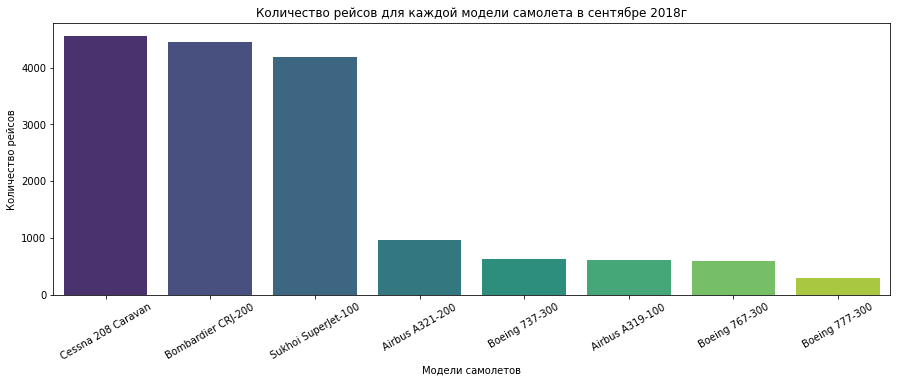

In [21]:
df1_sorted = df1.sort_values(by=['flights_amount'],ascending=False).copy()
plt.figure(figsize=(15,5))
graf = sns.barplot(x=df1_sorted['model'],y=df1_sorted['flights_amount'], palette="viridis")
graf.set_xticklabels(graf.get_xticklabels(),rotation=30)
plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов')
plt.title('Количество рейсов для каждой модели самолета в сентябре 2018г')
plt.show()

Первые 3 лидера пользуются особой популярностью, так как используются для полетов малой протяженности, а так же бизнес-поездок. Остальные используются для дальних перевозок пассажиров и имеют большее количество мест. Соответственно совершают меньше рейсов.

Рассмотрим среднее количество прибывших рейсов в день на карте России.

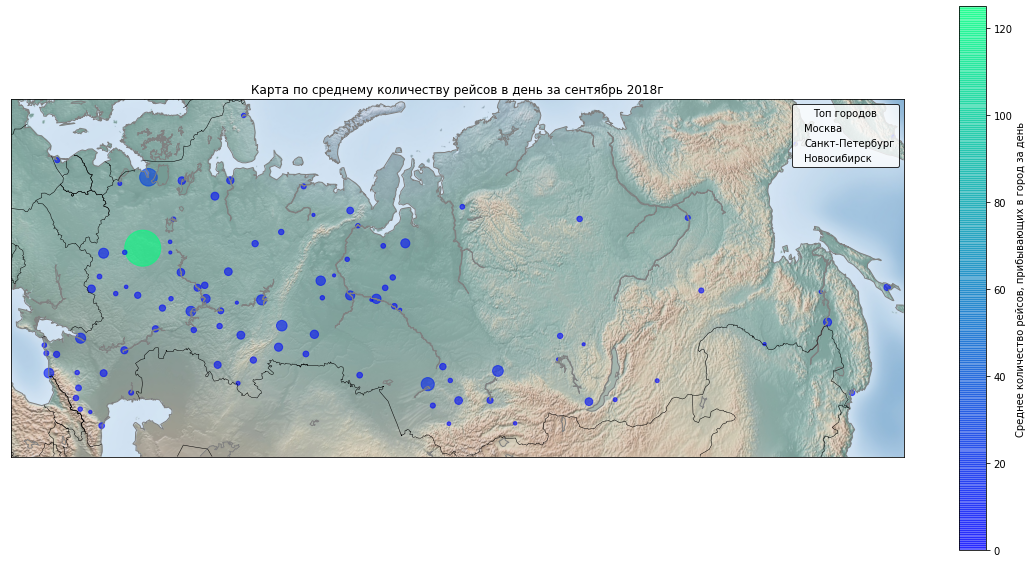

In [22]:
fig = plt.figure(figsize=(20,10))


m = Basemap(projection='lcc', resolution='l',
            lat_0=63.6267, lon_0=87.011,
            width=8E6, height=3.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')

plt.legend(labels = geo_df['city'],
           loc='upper right', handlelength=0, title='Топ городов', edgecolor='black')

m.scatter(geo_df['geo_lon'], geo_df['geo_lat'], latlon=True,
          s=geo_df['average_flights']*10, c=geo_df['average_flights'], cmap='winter', alpha=0.6)

plt.colorbar(label=r'Cреднее количество рейсов, прибывающих в город за день')
plt.clim(0, 125)
plt.title('Карта по среднему количеству рейсов в день за сентябрь 2018г', fontsize=12)

plt.show()

Как видно на карте, максимальная загрузка приходится на *Москву*, следом идут *Санкт-Петербург* и *Новосибирск*. Так же можно проследить скопление аэропортов у водоемов, особенно около *Азовского*, *Черного* и *Каспийского* морей. Это объясняется наличием курортов и туристических мест. Города с аэропортами около рек скорее обусловлены доступностью к пресной воде для нужд населения.

Для наглядности посмотрим на топ 10 городов по среднему количеству рейсов в день.

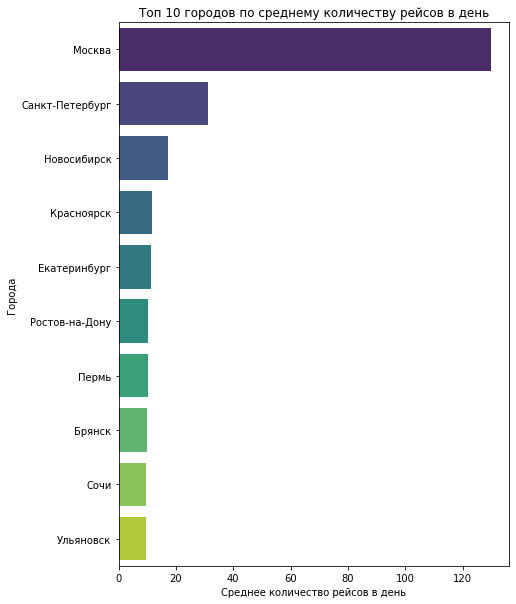

In [23]:
plt.figure(figsize=(7,10))
sns.barplot(x=geo_df['average_flights'][:10],y=geo_df['city'][:10], palette="viridis")
plt.xlabel('Среднее количество рейсов в день')
plt.ylabel('Города')
plt.title('Топ 10 городов по среднему количеству рейсов в день')
plt.show()

<a id='Вывод'></a>

# Вывод

Самые популярные аэропорты в сентябре 2018г по среднему количеству прибывших рейсов в день *Москва*, *Санкт-Петербург*, *Новосибирск*. Большая плотность постройки аэропортов вблизи водоемов обусловлена туризмом и нуждами населения в пресной воде.

Модели самолета разделены на 2 категории - для авиалиний малой протяженности или бизнес-поездок и авиалиний средней и дальней протяженности. Самолеты первой категории имеют большую популярность ввиду малого количества мест и ограниченного круга задач. Самолеты второй категории имеют большее количество посадочных мест, соответственно нет необходимости в частых перелетах. 

[К оглавлению](#К_оглавлению)

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод